## Final Project 
### Blindness Detection
#### Group: Gareth Sun zs389, Zimu Li zl898, Arman Syed as3778


### 1. Data Preprocess

In [18]:
# Import the Library we need
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt



In [19]:
# Load training Data
train_df = pd.read_csv('train.csv')
train_df['diagnosis'] = train_df['diagnosis'].astype(str)
train_df['pic_id'] = train_df['id_code'].astype(str)+'.png'
train_df.head()

,id_code,diagnosis,pic_id
0,000c1434d8d7,2,000c1434d8d7.png
1,001639a390f0,4,001639a390f0.png
2,0024cdab0c1e,1,0024cdab0c1e.png
3,002c21358ce6,0,002c21358ce6.png
4,005b95c28852,0,005b95c28852.png


In [20]:
# Data Load
preprocessor = ImageDataGenerator(
    # Normalization
    rescale= 1/255,
    # Use Data Augmentation to prevent overfitting
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip= True, 
    # Split validation and training dataset
    validation_split= 0.2
    )

# Set the batch and image size
image_size = 64
batch_size = 32

train_pic = preprocessor.flow_from_dataframe(
    dataframe= train_df,
    directory= 'train_images',
    x_col= 'pic_id',
    y_col= 'diagnosis',
    batch_size= batch_size,
    class_mode= 'categorical',
    shuffle= True,
    subset= 'training',
    target_size= (image_size, image_size)
)

test_pic = preprocessor.flow_from_dataframe(
    dataframe= train_df,
    directory= 'train_images',
    x_col= 'pic_id',
    y_col= 'diagnosis',
    batch_size= batch_size,
    class_mode= 'categorical',
    shuffle= True,
    subset= 'validation',
    target_size= (image_size, image_size)
)

# Covert category into one-hot code
train_label = pd.get_dummies(train_df['diagnosis'])
num_classes = train_label.shape[1]
num_samples = train_label.shape[0]

print(num_classes)
print(num_samples)

Found 2930 validated image filenames belonging to 5 classes.
Found 732 validated image filenames belonging to 5 classes.
5
3662


### 2. Build CNN Model

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [22]:
def cnn_model(image_size, num_classes):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model




In [23]:
model = cnn_model(image_size, num_classes)
# Save the model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback

tm = ModelCheckpoint('version1', monitor='val_loss', save_best_only = True, mode ='min', verbose = 1)

class AccuracyPlotter(Callback):
    def on_train_begin(self, logs={}):
        self.train_acc = []
        self.val_acc = []

    def on_epoch_end(self, epoch, logs={}):
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

    def on_train_end(self, logs={}):
        plt.figure(figsize=(20,10))
        plt.plot(range(1, len(self.train_acc) + 1), self.train_acc, label='Training Accuracy')
        plt.plot(range(1, len(self.val_acc) + 1), self.val_acc, label='Validation Accuracy')
        plt.title('Accuracy Plot')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.xticks(range(1, len(self.train_acc) + 1))
        plt.legend()
        plt.grid(True)
        plt.show()
        
plotter = AccuracyPlotter()

Epoch 1/50
91/91 [==============================] - ETA: 0s - loss: 1.1993 - accuracy: 0.5210
Epoch 1: val_loss improved from inf to 1.05323, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 316s 3s/step - loss: 1.1993 - accuracy: 0.5210 - val_loss: 1.0532 - val_accuracy: 0.5966
Epoch 2/50
91/91 [==============================] - ETA: 0s - loss: 0.9599 - accuracy: 0.6594
Epoch 2: val_loss improved from 1.05323 to 0.92199, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 308s 3s/step - loss: 0.9599 - accuracy: 0.6594 - val_loss: 0.9220 - val_accuracy: 0.6562
Epoch 3/50
91/91 [==============================] - ETA: 0s - loss: 0.8831 - accuracy: 0.6894
Epoch 3: val_loss improved from 0.92199 to 0.87268, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 307s 3s/step - loss: 0.8831 - accuracy: 0.6894 - val_loss: 0.8727 - val_accuracy: 0.6946
Epoch 4/50
91/91 [==============================] - ETA: 0s - loss: 0.8241 - accuracy: 0.7036
Epoch 4: val_loss improved from 0.87268 to 0.86937, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 303s 3s/step - loss: 0.8241 - accuracy: 0.7036 - val_loss: 0.8694 - val_accuracy: 0.6889
Epoch 5/50
91/91 [==============================] - ETA: 0s - loss: 0.8163 - accuracy: 0.7105
Epoch 5: val_loss improved from 0.86937 to 0.86083, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 309s 3s/step - loss: 0.8163 - accuracy: 0.7105 - val_loss: 0.8608 - val_accuracy: 0.6918
Epoch 6/50
91/91 [==============================] - ETA: 0s - loss: 0.8047 - accuracy: 0.7139
Epoch 6: val_loss did not improve from 0.86083
91/91 [==============================] - 308s 3s/step - loss: 0.8047 - accuracy: 0.7139 - val_loss: 0.8847 - val_accuracy: 0.7031
Epoch 7/50
91/91 [==============================] - ETA: 0s - loss: 0.7900 - accuracy: 0.7205
Epoch 7: val_loss improved from 0.86083 to 0.83866, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 830s 9s/step - loss: 0.7900 - accuracy: 0.7205 - val_loss: 0.8387 - val_accuracy: 0.6974
Epoch 8/50
91/91 [==============================] - ETA: 0s - loss: 0.7879 - accuracy: 0.7202
Epoch 8: val_loss improved from 0.83866 to 0.81617, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 881s 10s/step - loss: 0.7879 - accuracy: 0.7202 - val_loss: 0.8162 - val_accuracy: 0.7060
Epoch 9/50
91/91 [==============================] - ETA: 0s - loss: 0.7970 - accuracy: 0.7160 
Epoch 9: val_loss improved from 0.81617 to 0.81419, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 3256s 36s/step - loss: 0.7970 - accuracy: 0.7160 - val_loss: 0.8142 - val_accuracy: 0.7116
Epoch 10/50
91/91 [==============================] - ETA: 0s - loss: 0.7841 - accuracy: 0.7164
Epoch 10: val_loss improved from 0.81419 to 0.80575, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 309s 3s/step - loss: 0.7841 - accuracy: 0.7164 - val_loss: 0.8057 - val_accuracy: 0.7088
Epoch 11/50
91/91 [==============================] - ETA: 0s - loss: 0.7755 - accuracy: 0.7226
Epoch 11: val_loss improved from 0.80575 to 0.80062, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 311s 3s/step - loss: 0.7755 - accuracy: 0.7226 - val_loss: 0.8006 - val_accuracy: 0.7173
Epoch 12/50
91/91 [==============================] - ETA: 0s - loss: 0.7707 - accuracy: 0.7222
Epoch 12: val_loss did not improve from 0.80062
91/91 [==============================] - 313s 3s/step - loss: 0.7707 - accuracy: 0.7222 - val_loss: 0.8140 - val_accuracy: 0.7060
Epoch 13/50
91/91 [==============================] - ETA: 0s - loss: 0.7832 - accuracy: 0.7243 
Epoch 13: val_loss did not improve from 0.80062
91/91 [==============================] - 1296s 14s/step - loss: 0.7832 - accuracy: 0.7243 - val_loss: 0.8142 - val_accuracy: 0.7102
Epoch 14/50
91/91 [==============================] - ETA: 0s - loss: 0.7665 - accuracy: 0.7202
Epoch 14: val_loss improved from 0.80062 to 0.79497, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 315s 3s/step - loss: 0.7665 - accuracy: 0.7202 - val_loss: 0.7950 - val_accuracy: 0.7102
Epoch 15/50
91/91 [==============================] - ETA: 0s - loss: 0.7705 - accuracy: 0.7181
Epoch 15: val_loss did not improve from 0.79497
91/91 [==============================] - 342s 4s/step - loss: 0.7705 - accuracy: 0.7181 - val_loss: 0.7998 - val_accuracy: 0.7102
Epoch 16/50
91/91 [==============================] - ETA: 0s - loss: 0.7633 - accuracy: 0.7250
Epoch 16: val_loss improved from 0.79497 to 0.78503, saving model to version1
INFO:tensorflow:Assets written to: version1/assets


INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 316s 3s/step - loss: 0.7633 - accuracy: 0.7250 - val_loss: 0.7850 - val_accuracy: 0.7173
Epoch 17/50
91/91 [==============================] - ETA: 0s - loss: 0.7437 - accuracy: 0.7340 
Epoch 17: val_loss did not improve from 0.78503
91/91 [==============================] - 1256s 14s/step - loss: 0.7437 - accuracy: 0.7340 - val_loss: 0.8151 - val_accuracy: 0.7102
Epoch 18/50
91/91 [==============================] - ETA: 0s - loss: 0.7482 - accuracy: 0.7274
Epoch 18: val_loss did not improve from 0.78503
91/91 [==============================] - 310s 3s/step - loss: 0.7482 - accuracy: 0.7274 - val_loss: 0.8174 - val_accuracy: 0.7017
Epoch 19/50
91/91 [==============================] - ETA: 0s - loss: 0.7425 - accuracy: 0.7264
Epoch 19: val_loss did not improve from 0.78503
91/91 [==============================] - 2937s 33s/step - loss: 0.7425 - accuracy: 0.7264 - val_loss: 0.8298 - val_accuracy: 0.6918
Epoch 20/50
91/91 [===========================

INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 174s 2s/step - loss: 0.7234 - accuracy: 0.7367 - val_loss: 0.7555 - val_accuracy: 0.7259
Epoch 24/50
91/91 [==============================] - ETA: 0s - loss: 0.7215 - accuracy: 0.7308
Epoch 24: val_loss did not improve from 0.75553
91/91 [==============================] - 174s 2s/step - loss: 0.7215 - accuracy: 0.7308 - val_loss: 0.7721 - val_accuracy: 0.7259
Epoch 25/50
91/91 [==============================] - ETA: 0s - loss: 0.7244 - accuracy: 0.7329
Epoch 25: val_loss did not improve from 0.75553
91/91 [==============================] - 173s 2s/step - loss: 0.7244 - accuracy: 0.7329 - val_loss: 0.7765 - val_accuracy: 0.7202
Epoch 26/50
91/91 [==============================] - ETA: 0s - loss: 0.7141 - accuracy: 0.7395
Epoch 26: val_loss did not improve from 0.75553
91/91 [==============================] - 173s 2s/step - loss: 0.7141 - accuracy: 0.7395 - val_loss: 0.7935 - val_accuracy: 0.7060
Epoch 27/50
91/91 [==============================] 

INFO:tensorflow:Assets written to: version1/assets


91/91 [==============================] - 174s 2s/step - loss: 0.6411 - accuracy: 0.7616 - val_loss: 0.7469 - val_accuracy: 0.7372
Epoch 38/50
91/91 [==============================] - ETA: 0s - loss: 0.6345 - accuracy: 0.7629
Epoch 38: val_loss did not improve from 0.74691
91/91 [==============================] - 175s 2s/step - loss: 0.6345 - accuracy: 0.7629 - val_loss: 0.7978 - val_accuracy: 0.7202
Epoch 39/50
91/91 [==============================] - ETA: 0s - loss: 0.6260 - accuracy: 0.7674
Epoch 39: val_loss did not improve from 0.74691
91/91 [==============================] - 174s 2s/step - loss: 0.6260 - accuracy: 0.7674 - val_loss: 0.7882 - val_accuracy: 0.7116
Epoch 40/50
91/91 [==============================] - ETA: 0s - loss: 0.6195 - accuracy: 0.7736
Epoch 40: val_loss did not improve from 0.74691
91/91 [==============================] - 175s 2s/step - loss: 0.6195 - accuracy: 0.7736 - val_loss: 0.7918 - val_accuracy: 0.7188
Epoch 41/50
91/91 [==============================] 

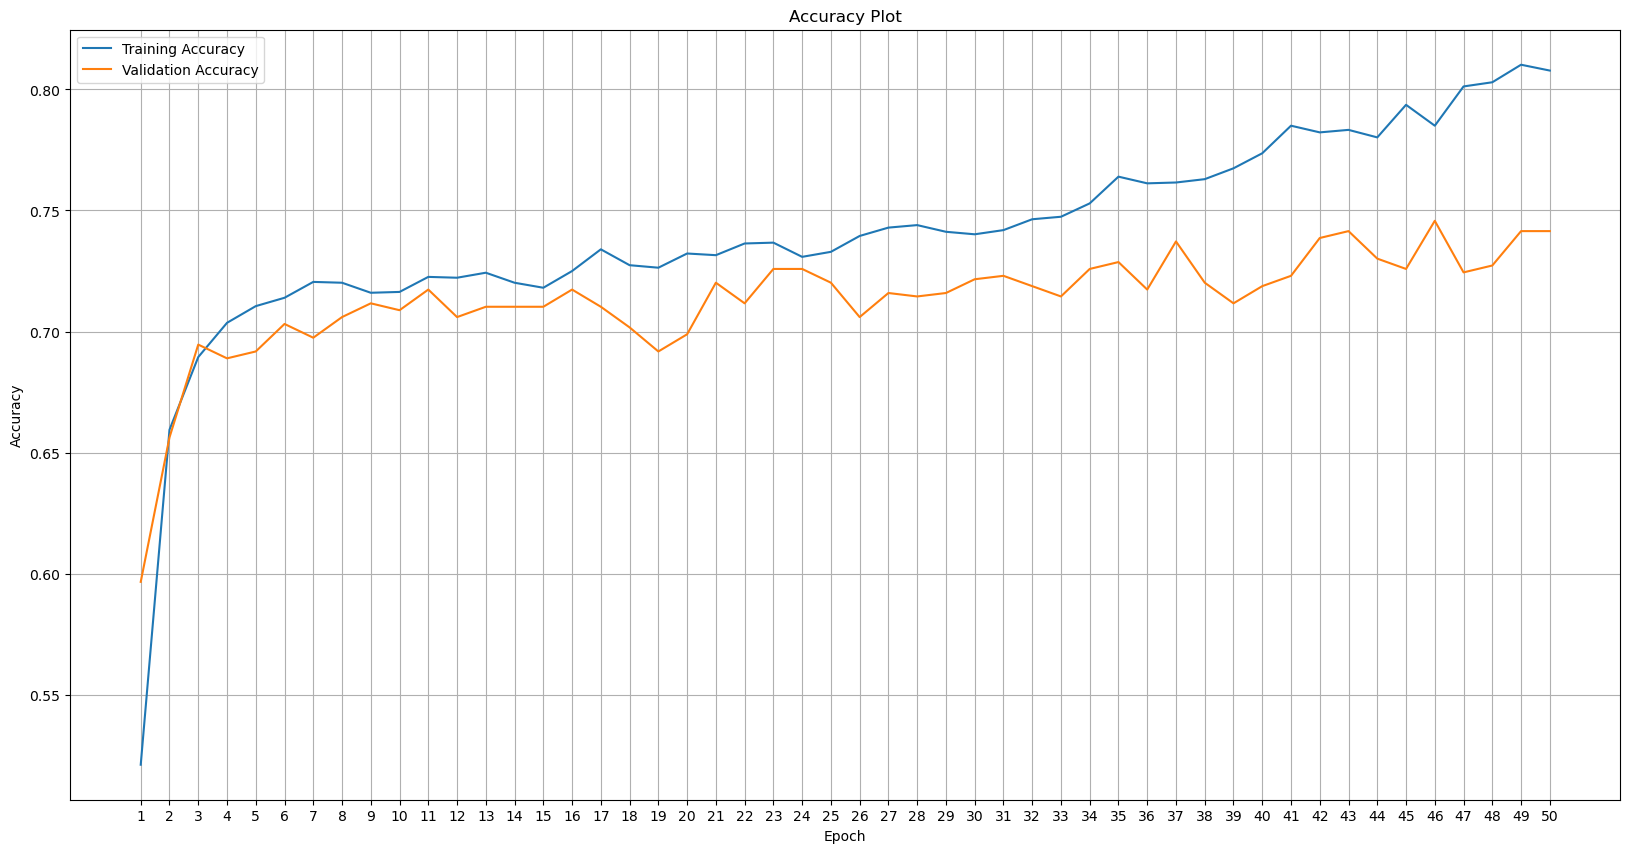

In [24]:
steps_per_epoch = 2930 // batch_size
validation_steps = 732 // batch_size
model.fit(
    train_pic,
    steps_per_epoch=steps_per_epoch, 
    epochs=50, 
    validation_data=test_pic,
    validation_steps=validation_steps,
    callbacks=[tm, plotter]
)

### 3. Give out Prediction Results

In [25]:
from keras.models import load_model
trained_model = load_model('version1')

prediction_df = pd.read_csv('sample_submission.csv')
prediction_df['pic_id'] = prediction_df['id_code'].astype(str)+'.png'

In [26]:
prediction_pic = ImageDataGenerator(
    rescale= 1/255
)
pre_prediction = prediction_pic.flow_from_dataframe(
    # Load Prediction Dataset
    dataframe= prediction_df,
    directory= 'test_images',
    x_col= 'pic_id',
    batch_size= batch_size,
    class_mode= None,
    shuffle= False,
    target_size= (image_size, image_size)
)

Found 1928 validated image filenames.


In [27]:
results = model.predict(pre_prediction, steps = len(pre_prediction))
max_probability = np.argmax(results,axis=1) 
prediction_df['diagnosis'] = max_probability
prediction_df.drop(columns=['pic_id'], inplace= True)
prediction_df.to_csv('submission.csv', index=False)

61/61 [==============================] - 31s 515ms/step
